<a href="https://colab.research.google.com/github/abhi-11nav/Churn-modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
url = 'https://raw.githubusercontent.com/abhi-11nav/Churn-modelling/main/Churn_Modelling.csv'

In [ ]:
dataset = pd.read_csv(url)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Checking for any missing values in the dataset

dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

We can observe that no feature has missing value 

In [ ]:
for x in dataset.columns:
  if len(pd.unique(dataset[x])) == dataset.shape[0]:
    print(x, "feature has unique values. So it does not add any value in the dataframe.")

RowNumber feature has unique values. So it does not add any value in the dataframe.
CustomerId feature has unique values. So it does not add any value in the dataframe.


In [ ]:
dataset.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

# Dropping columns with unique values

In [ ]:
# We know that "Surname" feature does not add much value to the dataframe either. So dropping the feature surname too 

dataset.drop("Surname",axis=1,inplace=True)


In [ ]:
# Printing the first 5 rows of the dataset

dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DEALING WITH CATEGORICAL VARIABLES

In [ ]:
# We notice that there are only two categorical varibales in the dataset. "Geography and Gender"

dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# We are going to encode the following categorical variables with label encoding.

from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
cat_feat_list = []

for x in dataset.columns:
  if type(dataset[x][0]) == str:
    cat_feat_list.append(x)

In [ ]:
categorical_variables = pd.DataFrame()

for x in cat_feat_list:
  categorical_variables[x] = dataset[x]

In [ ]:
for x in categorical_variables.columns:
  categorical_variables[x] = encoder.fit_transform(categorical_variables[x].values)

In [ ]:
categorical_variables["Geography"].value_counts() 

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [ ]:
# Seperating features and labels in the dataset

X = dataset.drop("Exited",axis=1)
y = dataset["Exited"]

In [ ]:
# Replacing the categorical varibles in the datset with encoded values 

for x in categorical_variables.columns:
  X[x] = categorical_variables[x]

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split 

train_X,test_x,train_y,test_y = train_test_split(X,y,test_size=0.28,random_state=101)

In [ ]:
print(train_X.shape, test_x.shape, train_y.shape, test_y.shape)

(7199, 10) (2801, 10) (7199,) (2801,)


In [ ]:
import keras 

from keras.models import Sequential 

from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import PReLU, LeakyReLU

In [ ]:
classifier = Sequential()

In [ ]:
# Adding the input and first hidden layer
classifier.add(Dense(12,activation="tanh",kernel_initializer="he_normal"))

# Adding the second hidden layer
classifier.add(Dense(12,kernel_initializer="normal",activation="tanh"))

# Adding a dropout layer
classifier.add(Dropout(0.5))

# Adding the third hidden layer
classifier.add(Dense(12,kernel_initializer="he_normal",activation="tanh"))


# Adding the output layer
classifier.add(Dense(1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [ ]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Feeding data to artificial neural network

model = classifier.fit(train_X,train_y,validation_split=0.30,batch_size=10,epochs=20)

Epoch 1/20
504/504 [==============================] - 5s 7ms/step - loss: 0.5162 - accuracy: 0.7948 - val_loss: 0.4976 - val_accuracy: 0.8023
Epoch 2/20
504/504 [==============================] - 3s 7ms/step - loss: 0.5087 - accuracy: 0.7964 - val_loss: 0.4977 - val_accuracy: 0.8023
Epoch 3/20
504/504 [==============================] - 3s 7ms/step - loss: 0.5077 - accuracy: 0.7964 - val_loss: 0.4973 - val_accuracy: 0.8023
Epoch 4/20
504/504 [==============================] - 3s 7ms/step - loss: 0.5086 - accuracy: 0.7964 - val_loss: 0.4979 - val_accuracy: 0.8023
Epoch 5/20
504/504 [==============================] - 4s 7ms/step - loss: 0.5077 - accuracy: 0.7964 - val_loss: 0.4972 - val_accuracy: 0.8023
Epoch 6/20
504/504 [==============================] - 3s 7ms/step - loss: 0.5073 - accuracy: 0.7964 - val_loss: 0.4985 - val_accuracy: 0.8023
Epoch 7/20
504/504 [==============================] - 4s 7ms/step - loss: 0.5067 - accuracy: 0.7964 - val_loss: 0.4975 - val_accuracy: 0.8023
Epoch 

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt 

No handles with labels found to put in legend.


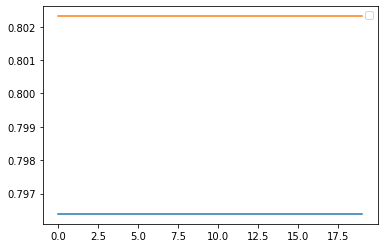

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])

plt.legend()

No handles with labels found to put in legend.


Text(0, 0.5, 'loss')

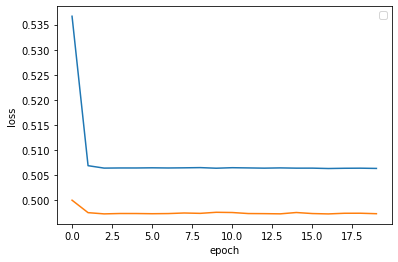

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
# Prediction of test features

predictions = classifier.predict(test_x)
predictions = (predictions>0.5)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(test_y,predictions)

In [ ]:
score

0.7915030346304891

In [ ]:
test_y

6676    0
6421    0
9834    1
8492    0
9982    1
       ..
7484    0
5705    0
6749    0
6553    1
7520    0
Name: Exited, Length: 2801, dtype: int64